In [1]:
import torch 
import numpy 
import matplotlib.pyplot as plt
from torch import nn

In [2]:
weight = 0.7
bias = 0.3

X = torch.arange(start= 0, end=1, step=0.002).unsqueeze(dim=1)
y = weight*X + bias

print(X.shape)
print(y.shape)
(X[:5], y[:5])

torch.Size([500, 1])
torch.Size([500, 1])


(tensor([[0.0000],
         [0.0020],
         [0.0040],
         [0.0060],
         [0.0080]]),
 tensor([[0.3000],
         [0.3014],
         [0.3028],
         [0.3042],
         [0.3056]]))

In [3]:
train_split = int(0.8 * len(X))
train_X, train_y = X[:train_split], y[:train_split]
test_X, test_y = X[train_split:], y[train_split:]

In [6]:
def plot_predictions(
    train_data, train_labels, test_data, test_labels, predictions=None
):
    plt.figure(figsize=(10, 6))
    plt.scatter(
        train_data.numpy(), train_labels.numpy(), c="orange", label="Training data", marker='.'
    )
    plt.scatter(
        test_data.numpy(), test_labels.numpy(), c="red", label="Testing data" , marker='o'
    )
    if predictions is not None:
        plt.scatter(
            test_data.numpy(), predictions.numpy(), c="blue", label="Predictions"
        )
    plt.legend()
    plt.show()

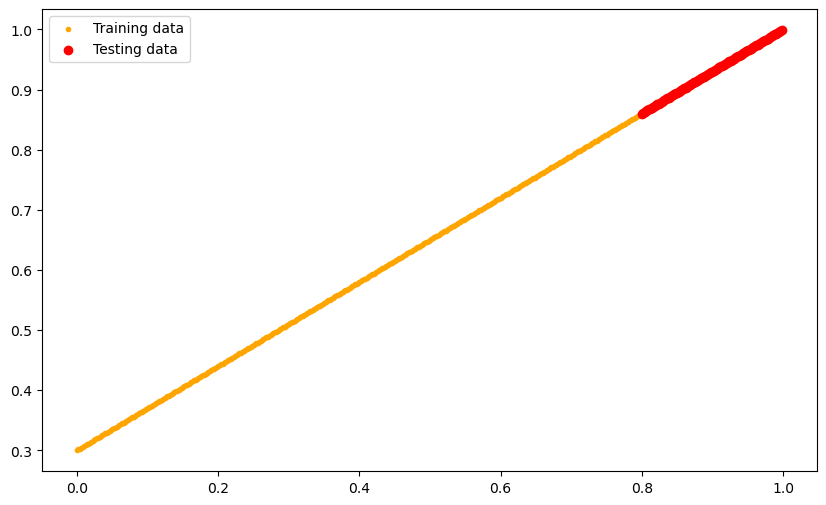

In [7]:
plot_predictions(train_X, train_y, test_X, test_y)

In [8]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=float))

    def forward(self, x):
        return x * self.weights + self.bias

In [9]:
torch.manual_seed(42)
model0 = LinearRegressionModel()

model0
model0.parameters

<bound method Module.parameters of LinearRegressionModel()>

In [10]:
model0.state_dict()

OrderedDict([('weights', tensor([0.3367], dtype=torch.float64)),
             ('bias', tensor([0.1288], dtype=torch.float64))])

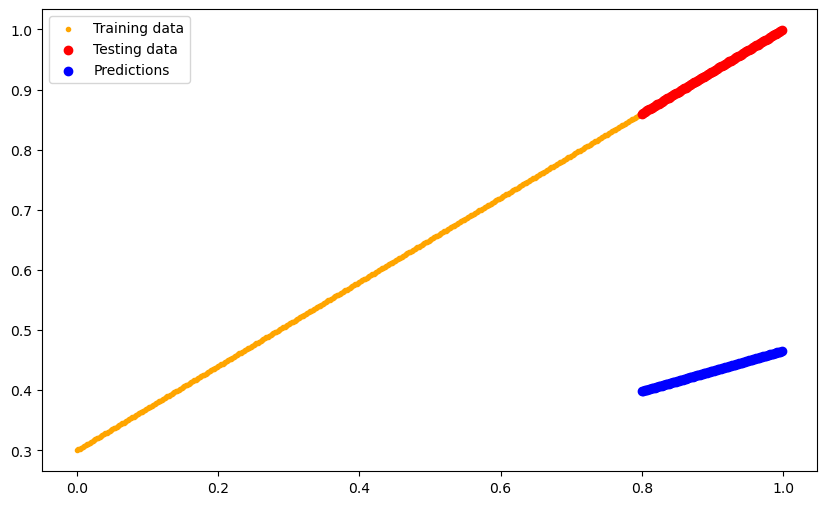

In [11]:
with torch.inference_mode():
    perd = model0(test_X)
    plot_predictions(train_X, train_y, test_X, test_y, perd)

In [12]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(model0.parameters(), lr=0.01)

In [13]:
epoches = 1000

TRAIN_LOSS=[]
TEST_LOSS=[]

for epoch in range(epoches):

    # Set the model to training mode
    model0.train()

    # Forward pass
    Y_pred = model0(train_X)

    # Compute Loss
    loss = loss_fn(Y_pred, train_y)
    # print(loss)

    # Zero gradients, backward pass, update weights
    optimizer.zero_grad()

    # Loss backward to compute gradients
    loss.backward()

    # Update weights (gradient descent)
    optimizer.step()

    model0.eval()
    with torch.inference_mode():
        test_pred = model0(test_X)
        
        test_loss = loss_fn(test_pred, test_y)  
        
        
    if epoch % 10 == 0:
        TRAIN_LOSS.append(loss.item())
        TEST_LOSS.append(test_loss.item())
        print(f"Epoch {epoch} - Loss: {loss.item() :.4f} - Test Loss: {test_loss.item() :.4f}")
    

Epoch 0 - Loss: 0.3162 - Test Loss: 0.4842
Epoch 10 - Loss: 0.2002 - Test Loss: 0.3483
Epoch 20 - Loss: 0.0899 - Test Loss: 0.2174
Epoch 30 - Loss: 0.0526 - Test Loss: 0.1433
Epoch 40 - Loss: 0.0450 - Test Loss: 0.1121
Epoch 50 - Loss: 0.0412 - Test Loss: 0.0975
Epoch 60 - Loss: 0.0378 - Test Loss: 0.0880
Epoch 70 - Loss: 0.0344 - Test Loss: 0.0797
Epoch 80 - Loss: 0.0309 - Test Loss: 0.0716
Epoch 90 - Loss: 0.0275 - Test Loss: 0.0637
Epoch 100 - Loss: 0.0241 - Test Loss: 0.0556
Epoch 110 - Loss: 0.0207 - Test Loss: 0.0477
Epoch 120 - Loss: 0.0173 - Test Loss: 0.0396
Epoch 130 - Loss: 0.0139 - Test Loss: 0.0317
Epoch 140 - Loss: 0.0104 - Test Loss: 0.0236
Epoch 150 - Loss: 0.0070 - Test Loss: 0.0157
Epoch 160 - Loss: 0.0036 - Test Loss: 0.0076
Epoch 170 - Loss: 0.0041 - Test Loss: 0.0081
Epoch 180 - Loss: 0.0041 - Test Loss: 0.0081
Epoch 190 - Loss: 0.0041 - Test Loss: 0.0081
Epoch 200 - Loss: 0.0041 - Test Loss: 0.0081
Epoch 210 - Loss: 0.0041 - Test Loss: 0.0081
Epoch 220 - Loss: 0.0

In [14]:
model0.state_dict()

OrderedDict([('weights', tensor([0.6973], dtype=torch.float64)),
             ('bias', tensor([0.2970], dtype=torch.float64))])

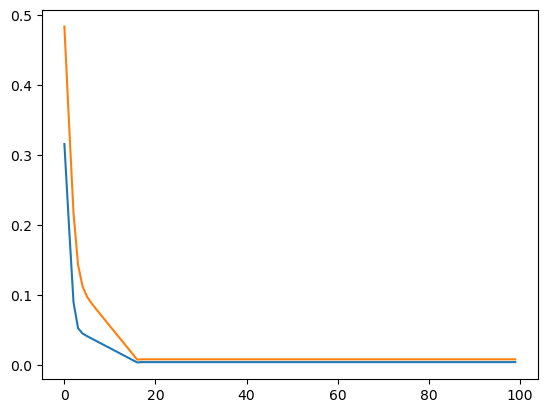

In [15]:
plt.plot(TRAIN_LOSS, label='train loss')
plt.plot(TEST_LOSS, label='train loss')

In [17]:
torch.save(model0.state_dict(), 'model/LinearRegression0model.pth')

In [22]:
loadedModel = LinearRegressionModel()

In [23]:
loadedModel.load_state_dict(torch.load('model/LinearRegression0model.pth'))

C:\Users\pavan\AppData\Local\Temp\ipykernel_30712\153631663.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loadedModel.load_state_dict(torch.load('model/LinearRegressio

<All keys matched successfully>

In [24]:
loadedModel.state_dict()

OrderedDict([('weights', tensor([0.6973], dtype=torch.float64)),
             ('bias', tensor([0.2970], dtype=torch.float64))])

In [25]:
torch.save(model0, 'model/LinearRegression0modelOg.pth')

In [26]:
OgLoad = torch.load("model/LinearRegression0modelOg.pth")

C:\Users\pavan\AppData\Local\Temp\ipykernel_30712\2269579263.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  OgLoad = torch.load("model/LinearRegression0modelOg.pth")


In [35]:
w1 = 0.4
w2 = 0.2
b = 0.4

X  = torch.arange(start=0, end=3, step=0.03).unsqueeze(dim=1)
y = w1*X + w2*X**2 + b

train_split = int(0.8 * len(X))
train_X, train_y = X[:train_split], y[:train_split]
test_X, test_y = X[train_split:], y[train_split:]


In [37]:
X[:5], y[:5]

(tensor([[0.0000],
         [0.0300],
         [0.0600],
         [0.0900],
         [0.1200]]),
 tensor([[0.4000],
         [0.4122],
         [0.4247],
         [0.4376],
         [0.4509]]))

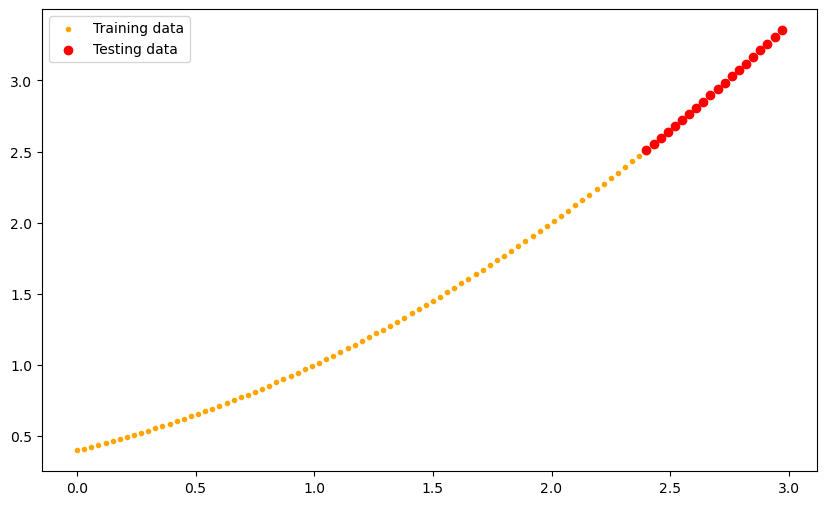

In [36]:
plot_predictions(train_X, train_y, test_X, test_y)

In [115]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=3)
        self.linear2 = nn.Linear(in_features=3, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        a =  self.linear1(x)
        a = torch.relu(a)
        b = self.linear2(a)
        b = torch.relu(b)
        return b

In [116]:
model1 = LinearRegressionModelV2()

In [117]:
model1.state_dict()

OrderedDict([('linear1.weight',
              tensor([[0.8994],
                      [0.3333],
                      [0.9623]])),
             ('linear1.bias', tensor([-0.8253, -0.9919, -0.7824])),
             ('linear2.weight', tensor([[-0.3884,  0.2339,  0.2067]])),
             ('linear2.bias', tensor([0.4797]))])

In [118]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.Adam(model1.parameters(), lr=0.01)

In [119]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [120]:
device

device(type='cuda')

In [122]:
TRAIN_LOSS = []
TEST_LOSS = []

In [130]:
epoches = 1000





for epoch in range(epoches):

    model1.train()

    y_pred = model1(train_X)

    loss = loss_fn(y_pred, train_y)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model1.eval()

    with torch.inference_mode():
        test_pred = model1(test_X)

        test_loss = loss_fn(test_pred, test_y)

    if epoch % 10 == 0:
        print(
            f"Epoch {epoch} - Loss: {loss.item() :.4f} - Test Loss: {test_loss.item() :.4f}"
        )
        TRAIN_LOSS.append(loss.item())
        TEST_LOSS.append(test_loss.item())

Epoch 0 - Loss: 0.0486 - Test Loss: 0.2715
Epoch 10 - Loss: 0.0486 - Test Loss: 0.2755
Epoch 20 - Loss: 0.0486 - Test Loss: 0.2812
Epoch 30 - Loss: 0.0487 - Test Loss: 0.2813
Epoch 40 - Loss: 0.0486 - Test Loss: 0.2809
Epoch 50 - Loss: 0.0486 - Test Loss: 0.2812
Epoch 60 - Loss: 0.0486 - Test Loss: 0.2777
Epoch 70 - Loss: 0.0486 - Test Loss: 0.2734
Epoch 80 - Loss: 0.0486 - Test Loss: 0.2721
Epoch 90 - Loss: 0.0487 - Test Loss: 0.2764
Epoch 100 - Loss: 0.0486 - Test Loss: 0.2843
Epoch 110 - Loss: 0.0486 - Test Loss: 0.2817
Epoch 120 - Loss: 0.0485 - Test Loss: 0.2753
Epoch 130 - Loss: 0.0486 - Test Loss: 0.2698
Epoch 140 - Loss: 0.0488 - Test Loss: 0.2842
Epoch 150 - Loss: 0.0486 - Test Loss: 0.2875
Epoch 160 - Loss: 0.0490 - Test Loss: 0.2731
Epoch 170 - Loss: 0.0490 - Test Loss: 0.2629
Epoch 180 - Loss: 0.0486 - Test Loss: 0.2710
Epoch 190 - Loss: 0.0485 - Test Loss: 0.2696
Epoch 200 - Loss: 0.0487 - Test Loss: 0.2656
Epoch 210 - Loss: 0.0487 - Test Loss: 0.2795
Epoch 220 - Loss: 0.0

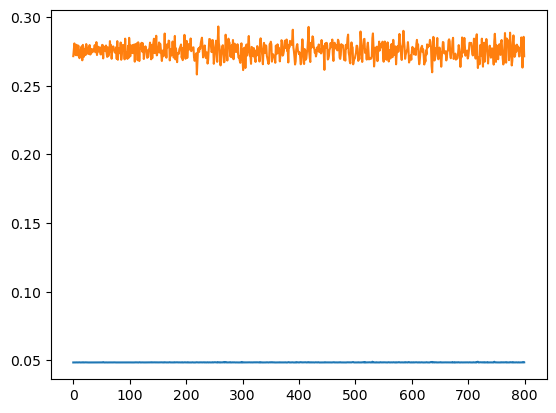

In [131]:
plt.plot(TRAIN_LOSS, label='train loss')
plt.plot(TEST_LOSS, label='train loss')

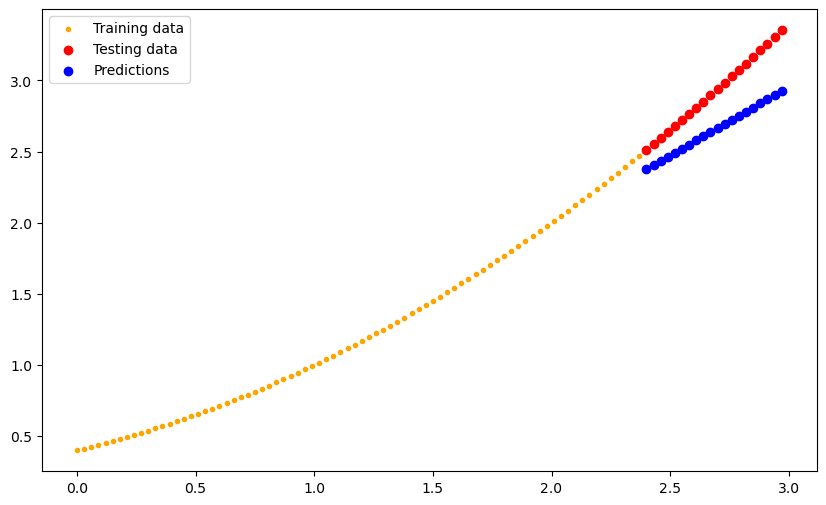

In [133]:
with torch.inference_mode():
    preds = model1(test_X)
    plot_predictions(train_X, train_y, test_X, test_y, preds)